In [15]:
import numpy as np
import math
import h5py
import glob
import matplotlib.pyplot as plt

In [5]:
def order(vel: np.ndarray) -> float:
    """Compute order parameter from velocity matrix
    Args:
        vel: velocity matrix (N x D)
    Returns:
        order: velocity correlation
    """
    N, _ = vel.shape
    speed = np.linalg.norm(vel, axis=1, keepdims=True)  # N x 1
    speed_prod = speed.dot(speed.T)  # N x N
    mask = (speed_prod != 0)  # avoid division by zero!
    dot_prod = vel.dot(vel.T)  # N x N
    np.fill_diagonal(dot_prod, 0)  # i != j
    return (dot_prod[mask] / speed_prod[mask]).sum() / (N * (N - 1))

In [8]:
# Construct output file name
out_str = "/home/lars/vmodel_output/"
args_def = {
'nprey': 100,
'npred': 5,
'frange': 10,
'fstr': 5,
'visPred': 120,
'visPrey': 330,
'astr': 3,
'dphi': 0.2,
'repPrey': 1,
'repRadPrey': 1,
'repPred': 1,
'repRadPred': 20,
'attPrey': 2,
'attRadPrey': 3,
'repCol': 1000,
'hstr': 1,
'steps': 12000,
    }

args_def = {
'nprey': 100,
'npred': 1,
'frange': 10,
'fstr': 0.0,
'visPred': 300.0,
'visPrey': 330,
'astr': 5.0,
'dphi': 0.2,
'repPrey': 3,
'repRadPrey': 1.5,
'repPred': 1,
'repRadPred': 20,
'attPrey': 3,
'attRadPrey': 1.5,
'repCol': 10000000,
'hstr': 1,
'steps': 1500,
    }



var_par = ["npred"]
var_val = [1]

runs = len(var_par)
#runs = 1

list_args = []
for i in range(runs):
    list_args.append(args_def.copy())

if len(var_par) != len(var_val):
    sys.exit( "Lists do not match!")


for i in range(runs):
    
    args = list_args[i]
    args[var_par[i]] = var_val[i]
    
    npred = args["npred"]
    nprey = args["nprey"]
    pred_visangle = 2*math.pi*args["visPred"]/360
    prey_visangle = 2*math.pi*args["visPrey"]/360



    args_str = '_'.join(f'{k}_{v}' for k, v in args.items())
    file_h5 = f'{out_str}_{args_str}.states.nc'



    #file_h5 = "/home/lars/vmodel/output/state.nc"
    name = "/home/lars/vmodel_output/testingPoly2_change_"+str(var_par[i])+"="+str(var_val[i])+"_"+args_str
    print(name)


    with h5py.File(file_h5) as fh5:


        pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[0,:,:,:]
        vel = np.moveaxis(np.array(fh5['/velocity']), [3,2], [1,3])[0,:,:,:]
        vis = np.array(fh5['/visibility'])

/home/lars/vmodel_output/testingPoly2_change_npred=1_nprey_100_npred_1_frange_10_fstr_0.0_visPred_300.0_visPrey_330_astr_5.0_dphi_0.2_repPrey_3_repRadPrey_1.5_repPred_1_repRadPred_20_attPrey_3_attRadPrey_1.5_repCol_10000000_hstr_1_steps_1500


In [10]:
np.shape(pos)

(1498, 101, 2)

In [17]:
pol = []
predTime = 2
for i in range(args["steps"]-predTime):
    pol.append(order(vel[i,:nprey,:]))

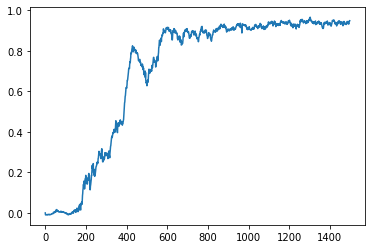

In [20]:
plt.plot(pol)

In [6]:
a = np.zeros((5,5))
a[1,3] = 2
a

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
from numpy import loadtxt
lines = loadtxt("noPred_pol_astr_dphi.csv", comments="#", delimiter=",", unpack=False)

In [11]:
np.shape(lines)


(20, 20)

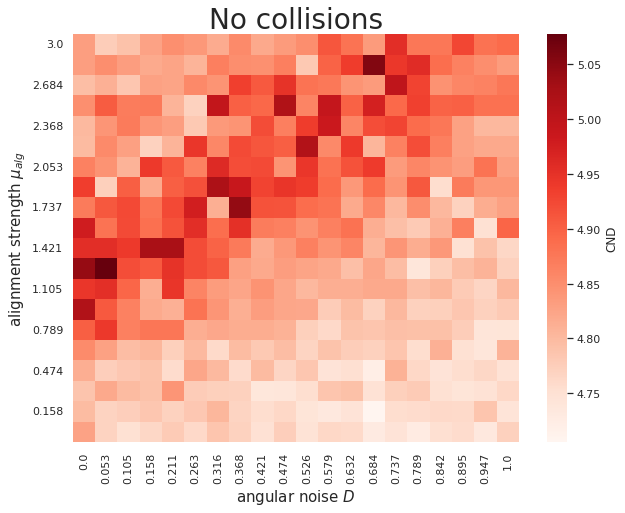

In [14]:
import pandas as pd
import seaborn as sns; sns.set_theme()
import array as arr
loc = "~/vmodel_output/"
file = "noPred_noMultCol_v2IID_astr_dphi.csv"
data = pd.read_csv(loc+file, header=None, index_col=False)
data = data[::-1]


steps = 20
reps = 30


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

data.index = np.flip(np.round(paraChange1_val,3))
data.columns = np.round(paraChange2_val,3)


sns.heatmap(data, cmap="Reds",cbar_kws={'label': "CND"})#, vmin = 0.52, vmax = 0.7)
plt.title("No collisions", fontsize = 28)
plt.xlabel("angular noise $D$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.gcf().set_size_inches(10,7.5)
plt.savefig(str(file)+".pdf")

In [8]:
data

,0.000,0.053,0.105,0.158,0.211,0.263,0.316,0.368,0.421,0.474,0.526,0.579,0.632,0.684,0.737,0.789,0.842,0.895,0.947,1.000
3.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.842,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


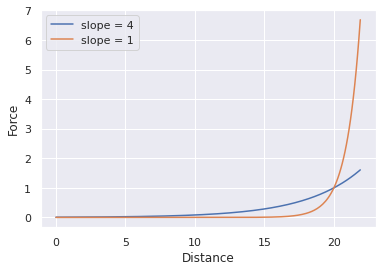

In [152]:
x = np.array(range(220))
x = x/10
#plt.plot(x, np.exp((x)))

pitch = 4
plt.plot(x, np.exp(-20/pitch+(x/pitch)), label = "slope = 4")
pitch = 1
plt.plot(x, np.exp(-20/pitch+(x/pitch)), label = "slope = 1")
plt.legend()
plt.xlabel('Distance')
plt.ylabel('Force')
plt.savefig("func.png")

In [1]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial


def calc_order(vel: np.ndarray) -> float:
    """Compute order parameter from velocity matrix
    Args:
        vel: velocity matrix (N x D)
    Returns:
        order: velocity correlation
    """
    N, _ = vel.shape
    speed = np.linalg.norm(vel, axis=1, keepdims=True)  # N x 1
    speed_prod = speed.dot(speed.T)  # N x N
    mask = (speed_prod != 0)  # avoid division by zero!
    dot_prod = vel.dot(vel.T)  # N x N
    np.fill_diagonal(dot_prod, 0)  # i != j
    return (dot_prod[mask] / speed_prod[mask]).sum() / (N * (N - 1))

    


out_str = "/extra2/knopf/vmodel_output/noPred_/"
saveLoc = "/extra2/knopf/vmodel_output/"
saveName = "noPred_"


args = {
'nprey': 100,
'npred': 1,
'frange': 10,
'fstr': 0.0,
'visPred': 300.0,
'visPrey': 330,
'astr': 3.0,
'dphi': 0.2,
'repPrey': 3,
'repRadPrey': 1.5,
'repPred': 1,
'repRadPred': 20,
'attPrey': 3,
'attRadPrey': 1.5,
'repCol': 10000000,
'hstr': 1,
'steps': 1500,
    }



paraChange1_name = "astr"
paraChange2_name = "dphi"
steps = 1
reps = 1

total = steps*steps*reps

paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

pol_scan = np.zeros((steps, steps))
IID_scan = np.zeros((steps, steps))
CND_scan = np.zeros((steps, steps))

time_now = datetime.datetime.now()
time_elapsed = 0


for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):

        #np.savetxt(str(saveLoc)+""+str(saveName)+"pol_"+str(paraChange1_name)+"_"+str(paraChange2_name)+".csv", pol_scan, delimiter=",")
  
        pol_reps = []
        IID_reps = []
        CND_reps = []
        
        args[paraChange1_name] = paraChange1_val[i]
        args[paraChange2_name] = paraChange2_val[j]

        npred = args["npred"]
        nprey = args["nprey"]

        args_str = '_'.join(f'{k}_{v}' for k, v in args.items())

        #file_h5 = f'{out_str}_{args_str}.states.nc'
        file_h5 = f'/home/lars/vmodel_output/MultColBack.nc'

        #print(file_h5)
        


        try:
            with h5py.File(file_h5) as fh5:
                vel = np.moveaxis(np.array(fh5['/velocity']), [3,2], [1,3])[:,:,:,:]
                pos = np.moveaxis(np.array(fh5['/position']), [3,2], [1,3])[:,:,:,:]

        except:
            print("File not Found, going on")
        
        

        for rep in range(reps):
            
            vel_rep = vel[rep,:,:,:]
            pos_rep = pos[rep,:,:,:]


            #print(np.shape(vel_rep))


            pol = []
            IID = []
            CND = []
            predTime = 2
            for ii in range(1300,args["steps"]-predTime):
                pol.append(calc_order(vel_rep[ii,:nprey,:]))
                pos_calc = pos_rep[ii,:nprey,:]
                dist = scipy.spatial.distance.cdist(pos_calc,pos_calc)
                IID.append(dist.sum() / (nprey * (nprey - 1)))
                dist[dist==0]=100
                CND.append(np.mean(dist.min(axis=1)))
                


In [5]:
np.shape(dist)

(100, 100)